# 3. Vectors and Matrices
Computational Methods, Oct. 2022, Kenji Doya

Here we work with vectors and matrices, and get acquainted with concepts in linear algebra by computing.

$$ % Latex macros
\newcommand{\mat}[1]{\begin{pmatrix} #1 \end{pmatrix}}
\newcommand{\p}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\b}[1]{\boldsymbol{#1}}
\newcommand{\w}{\boldsymbol{w}}
\newcommand{\x}{\boldsymbol{x}}
\newcommand{\y}{\boldsymbol{y}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Numpy *ndarray* as vector and matrix
You can create a matrix from a nested list.

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

You cam also create a matrix by stacking arrays vertically

In [3]:
b = np.array([1, 2, 3])
np.vstack((b, 2*b))

array([[1, 2, 3],
       [2, 4, 6]])

In [4]:
# another way of stacking row vectors
np.r_[[b, 2*b]]

array([[1, 2, 3],
       [2, 4, 6]])

or by combining arrays as column vectors

In [5]:
np.c_[b, 2*b]

array([[1, 2],
       [2, 4],
       [3, 6]])

You can also create an arbitrary matrix by list comprehension.

In [6]:
np.array([[10*i + j for j in range(3)] for i in range(2)])

array([[ 0,  1,  2],
       [10, 11, 12]])

Here are functions and attributes to check the type and shape of a vector or matrix.

In [7]:
len(A)  # in the outmost level

2

In [8]:
A.shape  # each dimension

(2, 3)

In [9]:
A.size  # total items

6

In [10]:
A.ndim  # dimension

2

In [11]:
A.dtype

dtype('int64')

A 2D numpy array is internally a linear sequence of data.  
`ravel( )` geves its flattened representation.

In [12]:
A.ravel()

array([1, 2, 3, 4, 5, 6])

The result of reshaping reflect this internal sequence.

In [13]:
A.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

You can excange rows and columns by transpose `.T`

In [14]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

### adressing components by [ ]

In [15]:
A[1]  # second row

array([4, 5, 6])

In [16]:
A[:,1]  # second column

array([2, 5])

In [17]:
A[:,::-1]  # columns in reverse order

array([[3, 2, 1],
       [6, 5, 4]])

You can specify arbitrary order by a list of indices.

In [18]:
A[[1,0,1]]  # rows

array([[4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [19]:
A[:, [1,2,1,0]]  # columns

array([[2, 3, 2, 1],
       [5, 6, 5, 4]])

In [20]:
A[[1,0,1], [1,2,0]]   # [A[1,1], A[0,2], A[1,0]]

array([5, 3, 4])

### common matrices

In [21]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [22]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [23]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
np.random.randn(2,3)  # normal distribution

array([[ 1.81969109, -0.05354721,  0.30491635],
       [-1.84028388,  0.65361849, -1.21401172]])

In [25]:
np.random.random(size=(2,3))  # uniform in [0, 1)

array([[0.6337558 , 0.32443693, 0.49182238],
       [0.32119066, 0.55643533, 0.62864497]])

In [26]:
np.random.uniform(-1, 1, (2,3))  # uniform in [-1, 1)

array([[ 0.76298247,  0.36295904, -0.01170254],
       [ 0.93442554, -0.97452917,  0.32334905]])

In [27]:
np.random.randint(-3, 3, size=(2,3))  # integers -3,...,2

array([[-2, -2, -2],
       [-3, -1,  1]])

In [28]:
np.empty((2,3), dtype=int)  # allocate without initialization

array([[ 4605047554664716140,  4600210108680099260, -4645472360589733760],
       [ 4606591776614398412, -4616419038914319184,  4599496558584604532]])

## Vectors and dot product
A vector can represent:
* a point in n-dimensional space
* a movement in n-dimensional space

The dot product (or inner product) of two vectors
$\b{x} = (x_1,...,x_n)$ and $\b{y} = (y_1,...,y_n)$
is defined as  
$$ \b{x} \cdot \b{y} = x_1 y_1 + ... + x_n y_n = \sum_{i=1}^n x_i y_i $$  

The inner product measures how two vectors match up, giving
$$ -||\b{x}||\,||\b{y}|| \le \b{x} \cdot \b{y} \le ||\b{x}||\,||\b{y}|| $$
with the maximum when two vectors line up, zero when two are orthogonal.

The length (or norm) of the vector is defined as  
$$ ||\b{x}|| = \sqrt{\sum_{i=1}^n x_i^2} = \sqrt{\b{x} \cdot \b{x}} $$


In [29]:
x = np.array([0, 1, 2])
y = np.array([3, 4, 5])
print( x * y)  # component-wise product

[ 0  4 10]


There are different ways to compute a dot product of vectors:

In [30]:
print( np.inner(x, y))
print( np.dot(x, y))
print( x.dot(y))
print( x @ y)

14
14
14
14


## Matrices and matrix product
A matrix can represent
* a set of vectors
* time series of vectors
* 2D image data,
* ...

The matrix product $AB$ is a matrix made of the inner products of the rows of $A$ and the columns of $B$.  
For 
$A = \left(\begin{array}{cc} a & b\\ c & d\end{array}\right)$
and 
$B = \left(\begin{array}{cc} e & f\\ g & h\end{array}\right)$,
the matrix product is 
$$ AB = \left(\begin{array}{cc} ae+bg & af+bh \\ ce+dg & cf+dh\end{array}\right). $$

In [31]:
A = np.array([[0, 1], [2, 3]])
print(A)
B = np.array([[3, 2], [1, 0]])
print(B)

[[0 1]
 [2 3]]
[[3 2]
 [1 0]]


In [32]:
print( A * B)  # component-wise
print( np.inner(A, B))  # row by row

[[0 2]
 [2 0]]
[[ 2  0]
 [12  2]]


There are several ways for a matrix product.

In [33]:
print( np.dot(A, B))
print( A.dot(B))
print( A @ B)  # new since Pyton 3.5

[[1 0]
 [9 4]]
[[1 0]
 [9 4]]
[[1 0]
 [9 4]]


## Matrix and vector space

A matrix product can mean:
* transformation to another vector space
* movement in the space

The product of a 2D matrix $A$ and a vector $\b{x}$ is given as
$$ A \b{x} = \mat{ a & b\\ c & d}\mat{x \\ y} = \mat{ax+by\\ cx+dy}. $$
Sepcifically for unit vectors
$$ A \mat{1 \\ 0} = \mat{ a \\ c } \mbox{and } A \mat{0 \\ 1} = \mat{ b \\ d}$$
meaning that each column of $A$ reporesents how a unit vector in each axis is transformed.

[[-2 -1  0  1  2 -2 -1  0  1  2 -2 -1  0  1  2 -2 -1  0  1  2 -2 -1  0  1
   2]
 [-2 -2 -2 -2 -2 -1 -1 -1 -1 -1  0  0  0  0  0  1  1  1  1  1  2  2  2  2
   2]]


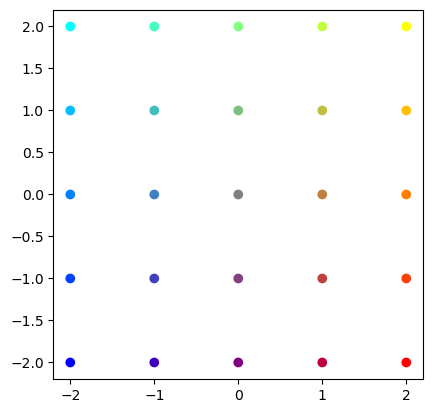

In [34]:
# Prepare a set of points in colors
s = 2  # grid size
x = np.arange(-s, s+1)
X1, X2 = np.meshgrid(x, x)
# 2xm matrix of points
X = np.vstack((np.ravel(X1), np.ravel(X2)))
print(X)
# red-blue for x, green for y
C = (np.vstack((X[0,:], X[1,:], -X[0,:])).T + s)/(2*s)
plt.scatter(X[0,:], X[1,:], c=C)
p = plt.axis('square')

[[0.26437765 0.03784953]
 [0.63873945 0.78288875]]


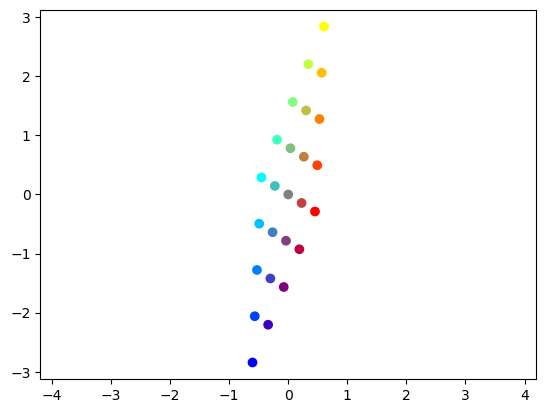

In [35]:
# See how those points are transformed by a matrix
a = 1
A = np.random.random((2, 2))*2*a - a   # uniform in [-a, a]
print(A)
AX = A @ X
plt.scatter(AX[0,:], AX[1,:], c=C)
p = plt.axis('equal')

## Determinant and inverse
The transformed space are expanded, shrunk, or flattened.  
The *determinant* of a square matrix measures the expansion of the volume.  
For a 2 by 2 matrix
$A = \left(\begin{array}{cc} a & b\\ c & d\end{array}\right)$,  
the determinant is computed by
$$\det A = ad - bc.$$

You can use `linalg.det()` for any matrix.

In [36]:
A = np.array([[1, 2], [3, 4]])
np.linalg.det(A)

-2.0000000000000004

If $\det A \ne 0$, a matrix is called *regular*, *non-singular*, or *invertible*.

The inverse $A^{-1}$ of a square matrix $A$ is defined as a matrix satisfying  
$$ AX = XA = I $$
where $I$ is the identity matrix.

In [37]:
Ainv = np.linalg.inv(A)
print(Ainv)
print( A @ Ainv)
print( Ainv @ A)

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]


## Solving linear algebraic equations
Many problems are formed as a set of linear equations:
$$ a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1 $$
$$ \vdots $$
$$ a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n = b_m $$
This can be expressed by a matrix-vector equation
$$ A\b{x} =\b{b} $$
where
$$ A = \left(\begin{array}{ccc} a_{11} & \cdots & a_{1n}\\
    \vdots &  & \vdots\\
    a_{m1} & \cdots & a_{mn}\end{array}\right), \quad
   \b{x} = \left(\begin{array}{c} x_1\\ \vdots\\ x_n\end{array}\right), \quad
   \b{b} = \left(\begin{array}{c} b_1\\ \vdots\\ b_m\end{array}\right). $$
If $m=n$ and $A$ is regular, the solution is given by 
$$ \b{x} = A^{-1} \b{b}. $$

In [38]:
A = np.array([[1., 2], [3, 4]])
b = np.array([1, 0])
Ainv = np.linalg.inv(A)
print("Ainv =", Ainv)
x = Ainv @ b
print('x = Ainv b =', x)
print('Ax =', A @ x)

Ainv = [[-2.   1. ]
 [ 1.5 -0.5]]
x = Ainv b = [-2.   1.5]
Ax = [1.0000000e+00 8.8817842e-16]


If $A^{-1}$ is used just once, it is more efficient to use a linear euqation solver function.

In [39]:
x = np.linalg.solve(A, b)
print('x = ', x)

x =  [-2.   1.5]


## Eigenvalues and eigenvectors
With a transformation by a symmetrix matrix $A$, some vectors keep its own direction. Such a vector is called an *eigenvector* and its scaling coefficient is called the *eigenvalue*.  
Eigenvalues and eigenvectors are derived by solving the equation
$$ A\b{x} = \lambda \b{x} $$
which is equivalent to $ A\b{x} - \lambda \b{x} = (A - \lambda I)\b{x} = 0.$  
Eigenvalues are derived by solving a polynomial equation
$$ \det (A - \lambda I) = 0 $$

You can use `linalg.eig()` function to numerically derive eigenvalues $\b{\lambda} = (\lambda_1,...,\lambda_n)$ and a matrix of eigenvectors in columns $V = (\b{v}_1,...,\b{v}_n)$.

In [40]:
A = np.array([[1, 2], [1, 0.5]])
print(A)
lam, V = np.linalg.eig(A)
print(lam)
print(V)

[[1.  2. ]
 [1.  0.5]]
[ 2.18614066 -0.68614066]
[[ 0.86011126 -0.76454754]
 [ 0.51010647  0.64456735]]


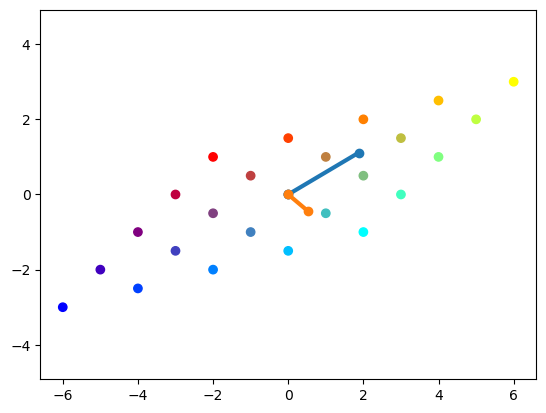

In [41]:
# colorful grid from above
AX = A @ X
plt.scatter(AX[0,:], AX[1,:], c=C)
# Plot eiven vectors scaled by eigen values
for i in range(2):
    plt.plot( [0, lam[i]*V[0,i]], [0, lam[i]*V[1,i]], 'o-', lw=3)
p = plt.axis('equal')

## Eigendecomposition

For a square matrix $A$, consider a matrix consisting of its eigenvalues on the diagonal
$$ \Lambda = \mbox{diag}(\lambda_1, \cdots, \lambda_n) $$
and another matrix made of their eigenvectors in columns
$$ V = (\b{v}_1, \cdots, \b{v}_n). $$

From
$$ AV = (\lambda_1 \b{v}_1, \cdots, \lambda_n \b{v}_n)
 = (\b{v}_1, \cdots, \b{v}_n)
   \mat{\lambda_1 & & \\ & \ddots & \\ & & \lambda_n}
 = V \Lambda, $$
if $V$ is invertible, $A$ can be represented as
$$ A = V \Lambda V^{-1}. $$

This representation of a matrix is called *eigendecomposition* or *spectral decomposition*.

This representation is extremely useful in multiplying $A$ many times as 
$$ A^k = V \Lambda^k V^{-1} = V \mbox{diag}(\lambda_1^k, \cdots, \lambda_n^k) V^{-1} $$
requires only exponentials in the diagonal terms rather than repeated matrix multiplications.

It also helps intutitive understanding of how a point $\b{x}$ transofrmed by $A$ many times as $A\b{x}, A^2\b{x}, A^3\b{x},...$ would move.

## Covariance matrix
For $m$ samples of $n$-dimensional variable 
$ \b{x} = (x_1,..., x_n)$
we usuall create a data matrix 
$$ X = \left(\begin{array}{ccc} x_1^1 & \cdots & x^1_n\\
    \vdots &  & \vdots\\
    x^m_1 & \cdots & x^m_n\end{array}\right).$$  

The covariance $c_{ij}$ of the components $x_i$ and $x_j$ represents how the two variables change togher around the mean:
$$ \bar{x}_i = \frac{1}{m} \sum_{k=1}^m x_i^k $$
$$ c_{ij} = \frac{1}{m-1} \sum_{k=1}^m (x_i^k - \bar{x}_i)(x_j^k - \bar{x}_j) $$

The covariance matrix $C$ consists of the covariances of all pairs of components
$$ C = \begin{pmatrix} c_{11} & \cdots & c_{1n}\\
    \vdots &  & \vdots\\
    c_{n1} & \cdots & c_{nn}\end{pmatrix}
    = \frac{1}{m-1} \sum_{k=1}^m (\b{x}^k - \bar{\b{x}})^T(\b{x}^k - \bar{\b{x}}) $$
where $\bar{x}$ is the mean vector
$$ \bar{\b{x}} = (\bar{x}_1,..., \bar{x}_n) = \frac{1}{m} \sum_{j=1}^m \b{x}^k
$$


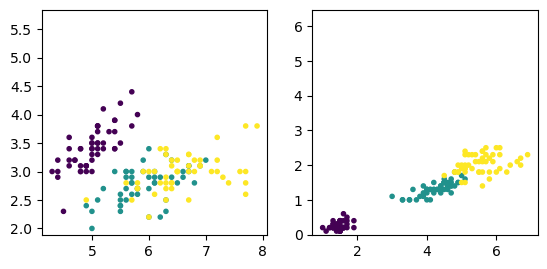

In [42]:
# Read in the iris data
X = np.loadtxt('data/iris.txt', delimiter=',')
Y = X[:,-1]  # flower type
X = X[:,:4]
m, n = X.shape
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=Y, marker='.')
plt.axis('square')
plt.subplot(1, 2, 2)
plt.scatter(X[:,2], X[:,3], c=Y, marker='.')
plt.axis('square');

In [43]:
xbar = np.mean(X, axis=0)
print("xbar =", xbar)
dX = X - xbar  # deviation from the mean
C = (dX.T @ dX)/(m-1)
print("C =", C)
# or using the built-in function
np.cov(X, rowvar=False)

xbar = [5.84333333 3.054      3.75866667 1.19866667]
C = [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

## Principal component analysis (PCA)
In taking a grasp of high-dimensional data, it is often useful to project the data onto a subspace where the data vary most.

To do that, we first take the covariance matrix $C$ of the data, compute its eigenvalues $\lambda_i$ and eigenvectors $\b{v}_i$, and project the data onto the subspace  spanned by the eigenvectors with largest eigen values.  
The eigenvectors $\b{v}_i$ of the covariance matrix is called *principal component vectors*, ordered by the magnitude of their eigenvalues.

Each data point $\b{x}$ is projected to the principal component vectors 
$(\b{v}_1\cdot\b{x}, \b{v}_2\cdot\b{x},...)$ for visualization.

In [44]:
lam, V = np.linalg.eig(C)
print('lam, V = ', lam, V)
# it is not guaranteed that the eigenvalues are sorted, so sort them
ind = np.argsort(-lam)  # indices for sorting, descending order
lams = lam[ind]
Vs = V[:,ind]
print('lams, Vs = ', lams, Vs)

lam, V =  [4.22484077 0.24224357 0.07852391 0.02368303] [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
lams, Vs =  [4.22484077 0.24224357 0.07852391 0.02368303] [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


Let us see the principal component vectors in the original space.

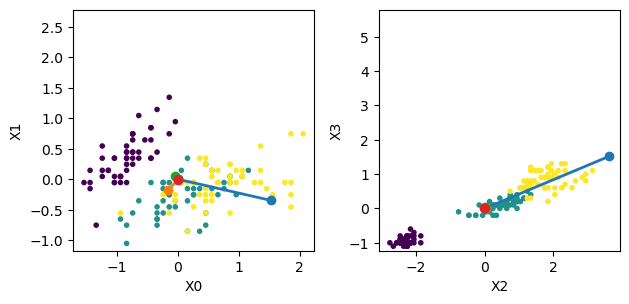

In [45]:
zero = np.zeros(n)
# first two components
plt.subplot(1, 2, 1)
plt.scatter(dX[:,0], dX[:,1], c=Y, marker='.')
for i in range(4):
    plt.plot( [0, lams[i]*Vs[0,i]], [0, lams[i]*Vs[1,i]], 'o-', lw=2)
plt.setp(plt.gca(), xlabel='X0', ylabel='X1')
plt.axis('square')
# last two components
plt.subplot(1, 2, 2)
plt.scatter(dX[:,2], dX[:,3], c=Y, marker='.')
for i in range(4):
    plt.plot( [0, lams[i]*Vs[2,i]], [0, lams[i]*Vs[3,i]], 'o-', lw=2)
plt.setp(plt.gca(), xlabel='X2', ylabel='X3')
plt.axis('square')
plt.tight_layout()  # adjust space

Now let us project the 4D data onto the space spanned by the eigenvectors.

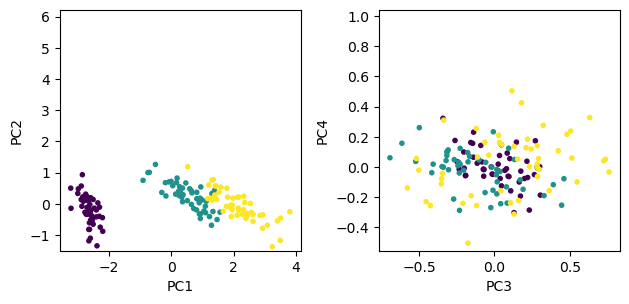

In [46]:
Z = dX @ Vs
plt.subplot(1, 2, 1)
plt.scatter(Z[:,0], Z[:,1], c=Y, marker='.')
plt.setp(plt.gca(), xlabel='PC1', ylabel='PC2')
plt.axis('square')
plt.subplot(1, 2, 2)
plt.scatter(Z[:,2], Z[:,3], c=Y, marker='.')
plt.setp(plt.gca(), xlabel='PC3', ylabel='PC4')
plt.axis('square')
plt.tight_layout()  # adjust space

## Singular value decomposition (SVD)
For a $(m\times n)$ matrix $A$, a non-negative value $\sigma>0$ satisfying
$$ A \b{v} = \sigma \b{u}$$
$$ A^T \b{u} = \sigma \b{v}$$
for unit vectors $||\b{u}||=||\b{v}||=1$ is called the *singular value*.   
$\b{u}$ and $\b{v}$ are called left- and right-singular vectors.

Singular value decomposition (SVD) of a $(m\times n)$ matrix $A$ is
$$ A = U S V^T = \sum_i \sigma_i \b{u}_i \b{v}_i^T $$
where $S=\mbox{diag}(\sigma_1,...,\sigma_k)$ is a diagonal matrix made of $k=\min(m,n)$ singular values,  
$U=(\b{u}_1,...,\b{u}_k)$ is a matrix made of orthogonal left-singular vectors, 
and $V=(\b{v}_1,...,\b{v}_k)$ is a matrix made of orthogonal right-singular vectors.

SVD represents a matrix by a weighted sum of outer products of column vectors $\b{u}_i$ and row vectors $\b{v}_i$, such as spatial patterns mixed by different time courses.

In [47]:
A = np.array([[0,1,2,3,4], [5,4,3,2,1], [1,3,2,4,3]])
print(A)
U, S, Vt = np.linalg.svd(A, full_matrices=False)
#V = Vt.T
print(U, S, Vt)
U @ np.diag(S) @ Vt

[[0 1 2 3 4]
 [5 4 3 2 1]
 [1 3 2 4 3]]
[[-0.45492565  0.62035527 -0.63890687]
 [-0.65816895 -0.71750629 -0.22803148]
 [-0.59988023  0.3167713   0.7347106 ]] [9.99063921 4.76417727 1.22055035] [[-0.38943704 -0.48918213 -0.40879452 -0.50853961 -0.42815201]
 [-0.686532   -0.27273461 -0.05840793  0.35538947  0.56971614]
 [-0.33218358  0.53508568 -0.40349583  0.46377343 -0.47480808]]


array([[2.99509511e-15, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        4.00000000e+00],
       [5.00000000e+00, 4.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 3.00000000e+00, 2.00000000e+00, 4.00000000e+00,
        3.00000000e+00]])

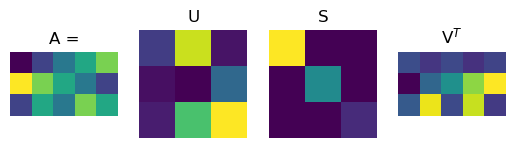

In [48]:
plt.subplot(1,4,1)
plt.imshow(A)
plt.title('A ='); plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(U)
plt.title('U'); plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(np.diag(S))
plt.title('S'); plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(Vt)
plt.title('V$^T$'); plt.axis('off');

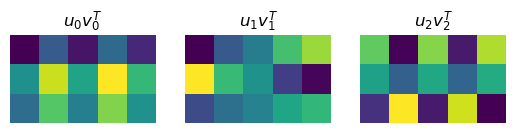

In [49]:
k = 3
for i in range(k):
    plt.subplot(1,k,i+1)
    plt.imshow(np.outer(U[:,i], Vt[i,:]))
    plt.title('$u_{0} v^T_{0}$'.format(i))
    plt.axis('off');

## PCA by SVD
From $X = U SV^T$ and the orothonormal construction of $U$ and $V$, we can see $C = \frac{1}{m-1}X^T X = \frac{1}{m-1}V S^2 V^T$ and $C\b{v}_i = \frac{1}{m-1}\sigma_i^2\b{v}_i$. 

Thus columns of $V$ are principal component vectors and $\frac{\sigma_i^2}{m-1}$ are their eigenvalues.

In [50]:
# iris data
print('by covariance:', lams, Vs)  # computed by eig of covariance matrix
U, S, Vt = np.linalg.svd(dX, full_matrices=False)
print('by SVD:', S**2/(m-1), Vt.T)

by covariance: [4.22484077 0.24224357 0.07852391 0.02368303] [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
by SVD: [4.22484077 0.24224357 0.07852391 0.02368303] [[ 0.36158968 -0.65653988  0.58099728  0.31725455]
 [-0.08226889 -0.72971237 -0.59641809 -0.32409435]
 [ 0.85657211  0.1757674  -0.07252408 -0.47971899]
 [ 0.35884393  0.07470647 -0.54906091  0.75112056]]


## Appendix: Eigen values of a 2x2 matrix

Let us take the simplest and the most important case of 2 by 2 matrix
$$ A = \pmatrix{a & b \\ c & d}. $$

We can analytically derive the eivenvalues from 
$$ \det (A - \lambda I) = (a-\lambda)(d-\lambda) - bc = 0 $$
as
$$ \lambda = \frac{a+d}{2} \pm \sqrt{\frac{(a-d)^2}{4}+ bc}. $$

The correctponding eigenvectors are not unique, but given by, for example, 
$$ \b{x} = \mat{b \\ \lambda - a}. $$

### Real eigenvalues

When $\frac{(a-d)^2}{4}+ bc \ge 0$, $A$ has two real eigenvalues
$\{\lambda_1, \lambda_2\}$ 
with corresponding eigenvectors
$\{ \b{v}_1, \b{v}_2 \}$ 

The movement of a point $\b{x}$ by $A$ as 
$A\b{x}, A^2\b{x}, A^3\b{x},...$ is composed of movements in the directions of the eigenvectors $\{ \b{v}_1, \b{v}_2 \}$.
It is convergent if $|\lambda_i|<1$
and divergent if  $|\lambda_i|>1.$

L = [2.  0.5]
V =  [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


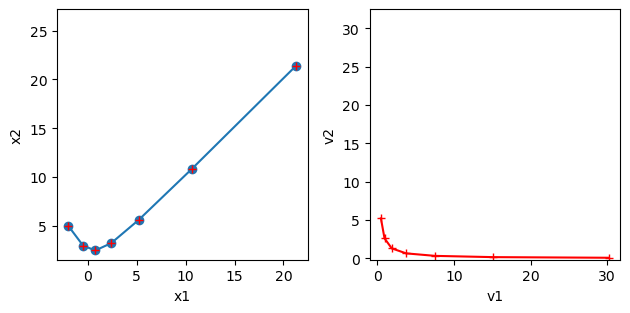

In [51]:
# take a 2x2 matrix
A = np.array([[1.5, 0.5], [1, 1]])
# check the eigenvalues and eigenvectors
L, V = np.linalg.eig(A)
print("L =", L)
print("V = ", V)
# take a point and see how it moves
K = 7  # steps
x = np.zeros((2, K))
x[:,0] = [-2, 5]
for k in range(K-1):
    x[:,k+1] = A @ x[:,k]  # x_{k+1} = A x_k
# plot the trajectory
plt.subplot(1,2,1)
plt.plot( x[0], x[1], 'o-')
plt.axis('square'); plt.xlabel("x1"); plt.ylabel("x2");
# In the eigenspace
y = np.zeros((2, K))
y[:,0] = np.linalg.inv(V) @ x[:,0] # map to eigenspace
for k in range(K-1):
    y[:,k+1] = L*y[:,k]  # z_{k+1} = L z_k
plt.subplot(1,2,2)
plt.plot( y[0], y[1], 'r+-')
plt.axis('square'); plt.xlabel("v1"); plt.ylabel("v2");
# Conver back to the original space
plt.subplot(1,2,1)
xv = (V @ y).real
plt.plot( xv[0], xv[1], 'r+')
plt.tight_layout();  # adjust the space

### Complex eigenvalues

When $\frac{(a-d)^2}{4}+ bc < 0$, $A$ has a pair of complex eigenvalues
$$ \lambda_1 = \alpha + i\beta \mbox{ and } \lambda_2 = \alpha - i\beta $$
where
$$ \alpha = \frac{a+d}{2} \mbox{ and } \beta^2 = -\frac{(a-d)^2}{4}- bc $$
with corresponding eigenvectors
$$ V = (\b{v}_1, \b{v}_2) = (\b{u}+i\b{w}, \b{u}-i\b{w}).$$ 

By eigendecomposition
$ A = V \Lambda V^{-1}, $
a point $\b{x}$ is converted to points in a complex plane and multipled by a complex eigenvalue, which means rotation and scaling.
Points in the complex plane are then converted back in a real vector spce by multiplication with $V$.

To see the rotation and scaling more explicityly, we can represent $\Lambda=\mat{\alpha+i\beta & 0 \\ 0 & \alpha-i\beta}$ as 
$$\Lambda = U R U^{-1}$$ 
where $R$ is 
$$ R = \mat{\alpha & -\beta \\ \beta & \alpha}
 = \mat{r\cos\theta & -r\sin\theta \\ r\sin\theta & r\cos\theta }.$$
 
Here $r=|\lambda|=\sqrt{\alpha^2+\beta^2}$ is the scaling factor and $\theta$ is the angle of rotation.

We can choose $U$ as 
$$ U = \frac{1}{2}\mat{1 & i \\ 1 & -i} $$
such that 
$VU = (\b{u}, -\b{w})$.
Then we have another decomposition of $A$ as
$$ A = V \Lambda V^{-1}
 = V URU^{-1} V^{-1}
 = (\b{u}, -\b{w}) \mat{r\cos\theta & -r\sin\theta \\ r\sin\theta & r\cos\theta} (\b{u}, -\b{w})^{-1} $$


L = [0.75+0.96824584j 0.75-0.96824584j]
V =  [[0.1767767 +0.6846532j 0.1767767 -0.6846532j]
 [0.70710678+0.j        0.70710678-0.j       ]]
R = [[ 0.75       -0.96824584]
 [ 0.96824584  0.75      ]]
VU = [[ 0.1767767  -0.6846532 ]
 [ 0.70710678 -0.        ]]


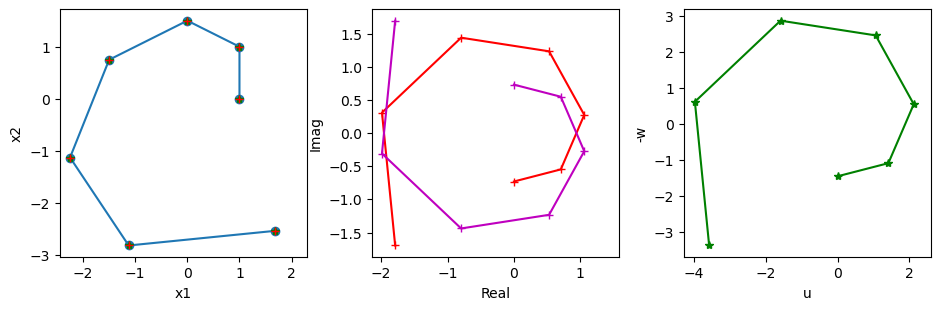

In [52]:
# take a 2x2 matrix
A = np.array([[1, -1], [1, 0.5]])
# check the eigenvalues and eigenvectors
L, V = np.linalg.eig(A)
print("L =", L)
print("V = ", V)
# take a point and see how it moves
K = 7  # steps
x = np.zeros((2, K))
x[:,0] = [1, 0]
for k in range(K-1):
    x[:,k+1] = A @ x[:,k]  # x_{k+1} = A x_k
# plot the trajectory
plt.subplot(1,3,1)
plt.plot( x[0], x[1], 'o-')
plt.axis('square'); plt.xlabel("x1"); plt.ylabel("x2");
# In the eigenspace
z = np.zeros((2, K), dtype=complex)
z[:,0] = np.linalg.inv(V) @ x[:,0]
for k in range(K-1):
    z[:,k+1] = L*z[:,k]  # z_{k+1} = L z_k
plt.subplot(1,3,2)
plt.plot( z[0].real, z[0].imag, 'r+-')
plt.plot( z[1].real, z[1].imag, 'm+-')
plt.axis('square'); plt.xlabel("Real"); plt.ylabel("Imag");
# In the cos-sin space
VU = np.c_[V[:,0].real, -V[:,0].imag]
R = np.array([[L[0].real, -L[0].imag], [L[0].imag, L[0].real]])
print("R =", R)
print("VU =", VU) 
y = np.zeros((2, K))
y[:,0] = np.linalg.inv(VU) @ x[:,0]
for k in range(K-1):
    y[:,k+1] = R @ y[:,k]  # y_{k+1} = R y_k
plt.subplot(1,3,3)
plt.plot( y[0], y[1], 'g*-')
plt.axis('square'); plt.xlabel("u"); plt.ylabel("-w");
# Conver back to the original space
plt.subplot(1,3,1)
xc = (V @ z).real
xr = VU @ y
plt.plot( xr[0], xr[1], 'g*')
plt.plot( xc[0], xc[1], 'r+')
plt.tight_layout(rect=[0, 0, 1.5, 1]);  # fit in extra width

The trajectory in the complex space or the $(\b{u},-\b{w})$ space is a regular spirals, which is mapped to a skewed spiral in the original space.